Create dummy variables for each categorical variables.

Use pandas value_counts() to see the distributions of the data

Use seaborn to make violin plots of the salaries by variable

For each categorical variable:

Fit a model to the entire data set without the dummy variables for that category (but include the others).

Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model.

Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.

Use regularization (e.g. Ridge Regression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?


In [13]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [14]:
%pwd

u'/Users/mgnbecker/week03_notes'

In [17]:
# Load the data (use delim_whitespace=True)

df = pd.read_stata('salary.dta')
delim_whitespace=True
df.head() 

,sx,rk,yr,dg,yd,sl
0,Male,Full,25.0,1.0,35.0,36350.0
1,Male,Full,13.0,1.0,22.0,35350.0
2,Male,Full,10.0,1.0,23.0,28200.0
3,Female,Full,7.0,1.0,27.0,26775.0
4,Male,Full,19.0,0.0,30.0,33696.0


In [34]:
df.columns

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_Male', u'sx_Female',
       u'rk_Assistant', u'rk_Associate', u'rk_Full', u'dg_0.0', u'dg_1.0'],
      dtype='object')

In [25]:
# Apply value_counts() to series for "sx", "dg", and "rk"
df ['sx'].value_counts()

Male      38
Female    14
Name: sx, dtype: int64

In [26]:
df ['dg'].value_counts()

1.0    34
0.0    18
Name: dg, dtype: int64

In [27]:
df ['rk'].value_counts()

Full         20
Assistant    18
Associate    14
Name: rk, dtype: int64

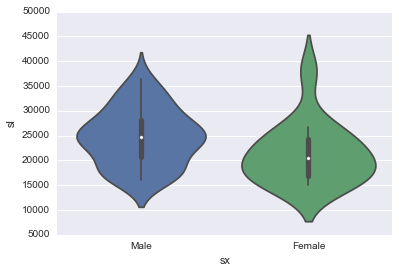

In [21]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()


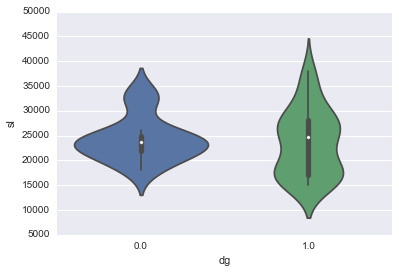

In [28]:
sns.violinplot(x="dg", y="sl", data=df)
plt.show()

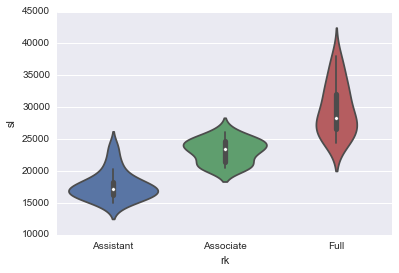

In [29]:
sns.violinplot(x="rk", y="sl", data=df)
plt.show()

In [22]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables
# pd.get_dummies(df['key'])

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_Male', u'sx_Female',
       u'rk_Assistant', u'rk_Associate', u'rk_Full', u'dg_0.0', u'dg_1.0'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_Male,sx_Female,rk_Assistant,rk_Associate,rk_Full,dg_0.0,dg_1.0
0,Male,Full,25.0,1.0,35.0,36350.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Male,Full,13.0,1.0,22.0,35350.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,Male,Full,10.0,1.0,23.0,28200.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Female,Full,7.0,1.0,27.0,26775.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,Male,Full,19.0,0.0,30.0,33696.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [32]:
#Merge dummy variables with main data
#Three different ways to do it:
#pd.concat(MAIN_DATA, DUMMY_DATA, axis=1)

#MAIN_DATA.join(DUMMY_DATA)

pd.merge(df, dummies, left_index=True, right_index=True)

,sx,rk,yr,dg,yd,sl,sx_Male,sx_Female,rk_Assistant,rk_Associate,rk_Full,dg_0.0_x,dg_1.0_x,dg_0.0_y,dg_1.0_y
0,Male,Full,25.0,1.0,35.0,36350.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,Male,Full,13.0,1.0,22.0,35350.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Male,Full,10.0,1.0,23.0,28200.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,Female,Full,7.0,1.0,27.0,26775.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,Male,Full,19.0,0.0,30.0,33696.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,Male,Full,16.0,1.0,21.0,28516.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
6,Female,Full,0.0,0.0,32.0,24900.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
7,Male,Full,16.0,1.0,18.0,31909.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,Male,Full,13.0,0.0,30.0,31850.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,Male,Full,13.0,0.0,31.0,32850.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [80]:
df.columns

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_Male', u'sx_Female',
       u'rk_Assistant', u'rk_Associate', u'rk_Full', u'dg_0.0', u'dg_1.0'],
      dtype='object')

In [55]:
# Here's an example to get you started. 

subset = df.sample(frac=0.1, replace=False)

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

Sample: 0.990178820784


In [75]:
# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "All data with sample model:", model.score(X, y)


All data with sample model: 0.578201921498


In [57]:
# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) #Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample with regularization:", model.score(X, y)

Sample with regularization: 0.968763622517


In [76]:
# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "All data with regularization model:", model.score(X, y)

All data with regularization model: 0.578201921498


In [59]:
# Did the results improve?

In [77]:
# Fit a model to the men
df["sx"] == "male"
X = df[u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_Male', u'sx_Female', u'rk_Assistant', u'rk_Associate', u'rk_Full', u'dg_0.0', u'dg_1.0']
y = df[u'sl']

## Fit a linear model here
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Male Linear Model", model.score(X, y)

KeyError: (u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_Male', u'sx_Female', u'rk_Assistant', u'rk_Associate', u'rk_Full', u'dg_0.0', u'dg_1.0')

In [ ]:
## Plot the data
## and print the model score



In [78]:
#Apply the same model to the women and compare the model score
df["sx"] == "female"

X = df[u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_Male', u'sx_Female', u'rk_Assistant', u'rk_Associate', u'rk_Full', u'dg_0.0', u'dg_1.0']
y = df[u'sl']

## Fit a linear model here
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Female Linear Model", model.score(X, y)

KeyError: (u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_Male', u'sx_Female', u'rk_Assistant', u'rk_Associate', u'rk_Full', u'dg_0.0', u'dg_1.0')

In [ ]:
# What about the other order? Apply to women first





In [ ]:
# Apply to men

In [ ]:
# This time use regularlization (RidgeCV)

# Apply to women first


# Apply to men

In [ ]:
mask = (df["dg"] == "doctorate")

In [ ]:
# Reverse the order

mask = (df["dg"] != "doctorate") # !=

In [ ]:
# With regularization

mask = (df["dg"] != "doctorate") # !=

In [ ]:
mask = (df["rk"] == "full") # First subset, there are two more

In [ ]:
# The second permutation of three

In [ ]:
# The third permutation of three